In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community

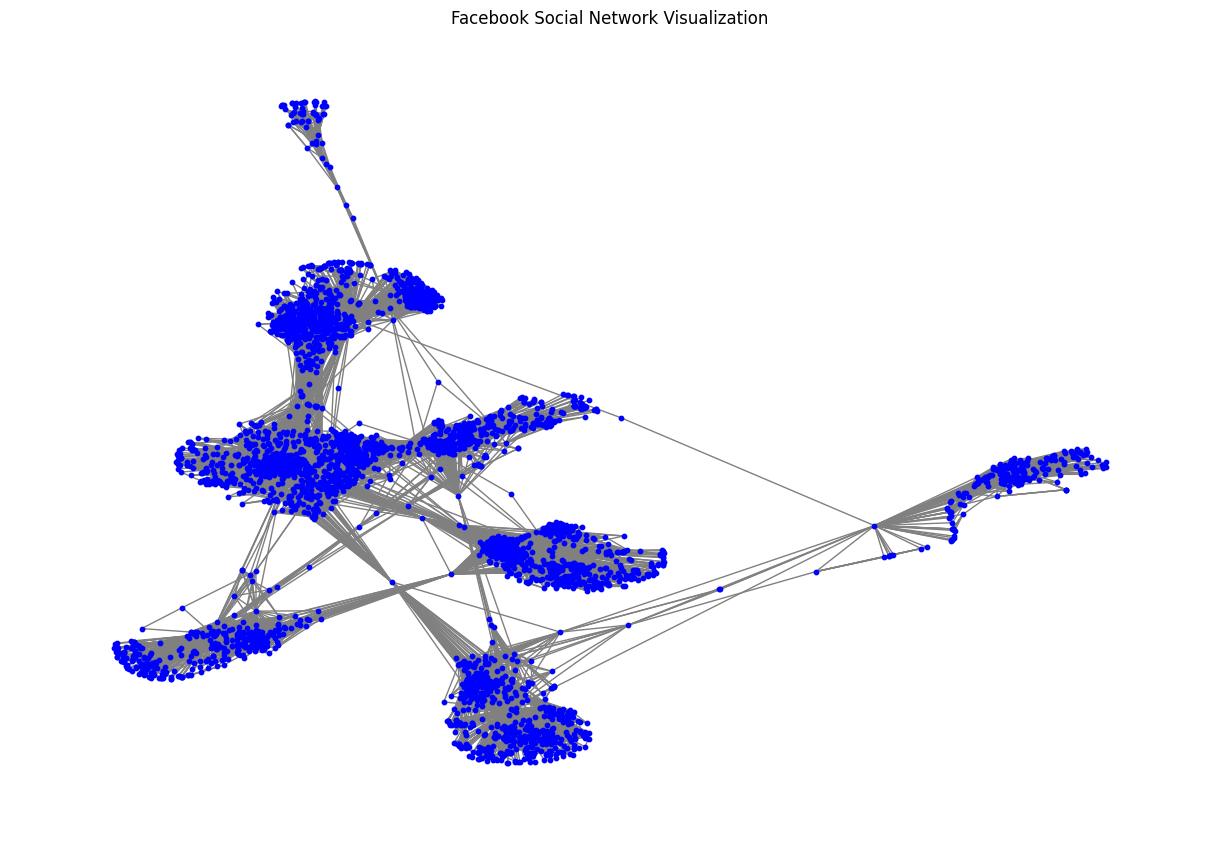

In [7]:
# Load the Facebook Social Network dataset
G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

# a. Introduction
# Visualization of the Network
plt.figure(figsize=(12, 8))
nx.draw(G, node_size=10, node_color='blue', edge_color='gray')
plt.title('Facebook Social Network Visualization')
plt.show()

In [8]:
# b. Network Characteristics
size = G.number_of_nodes()
num_links = G.number_of_edges()
avg_path_length = nx.average_shortest_path_length(G)
clustering_coefficient = nx.average_clustering(G)

In [10]:
# Distance Metrics
diameter = nx.diameter(G)
eccentricity = nx.eccentricity(G)
radius = nx.radius(G)
center = list(nx.center(G))
periphery = list(nx.periphery(G))
total_length = sum(sum(lengths.values()) for node, lengths in nx.shortest_path_length(G))
avg_distance = total_length / (size * (size - 1))


print(f'Size of the Network: {size}')
print(f'Number of Links: {num_links}')
print(f'Average Path Length: {avg_path_length}')
print(f'Clustering Coefficient: {clustering_coefficient}')
print(f'Diameter: {diameter}')
print(f'Radius: {radius}')
print(f'Center Nodes: {center}')
print(f'Periphery Nodes: {periphery}')
print(f'Average Distance: {avg_distance}')

Size of the Network: 4039
Number of Links: 88234
Average Path Length: 3.6925068496963913
Clustering Coefficient: 0.6055467186200876
Diameter: 8
Radius: 4
Center Nodes: [567]
Periphery Nodes: [687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 699, 700, 701, 702, 704, 705, 706, 707, 709, 710, 711, 712, 714, 715, 716, 717, 718, 720, 721, 722, 723, 724, 725, 726, 727, 728, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 746, 748, 749, 750, 751, 752, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 770, 771, 773, 775, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 799, 801, 802, 806, 807, 808, 809, 812, 813, 814, 815, 816, 817, 818, 820, 821, 822, 824, 826, 827, 829, 831, 832, 833, 834, 835, 836, 837, 838, 839, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 39

# Centrality Measure

### Degree Centrality

**Definition:**  
Degree centrality for a node \( v \) is defined as the fraction of nodes it is connected to.

**Formula:**  
$$
C_D(v) = \frac{\text{degree}(v)}{n - 1}
$$

where \(\text{degree}(v)\) is the number of edges connected to node \( v \) and \( n \) is the total number of nodes in the graph.

**Explanation:**  
Degree centrality simply counts how many neighbors a node has, normalized by the maximum possible number of neighbors (which is \( n-1 \) for an undirected graph).

---

### Eigenvector Centrality

**Definition:**  
Eigenvector centrality assigns relative scores to all nodes in the network based on the principle that connections to high-scoring nodes contribute more to the score of the node in question.

**Formula:**  
$$
C_E(v) = \frac{1}{\lambda} \sum_{u \in \mathcal{N}(v)} C_E(u)
$$

where $$(\mathcal{N}(v))$$ is the set of neighbors of node $$(v)$$ and $$(λ)$$ is a constant (the largest eigenvalue of the adjacency matrix of the graph), and $$(C_E)$$ is the eigenvector centrality.

**Explanation:**  
Eigenvector centrality considers not just the quantity of connections a node has, but also the quality (i.e., the centrality scores) of those connections.

---

### Betweenness Centrality

**Definition:**  
Betweenness centrality measures the extent to which a node lies on paths between other nodes. It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

**Formula:**  
$$
C_B(v) = \sum_{s \ne v \ne t} \frac{\sigma_{st}(v)}{\sigma_{st}}
$$

where $$(\sigma_{st})$$ is the total number of shortest paths from node $$(s)$$ to node $$(t)$$, and $$( \sigma_{st}(v))$$ is the number of those paths that pass through $$(v)$$.

**Explanation:**  
Betweenness centrality identifies nodes that serve as critical points of passage within the network. Nodes with high betweenness centrality are important for the flow of information or resources.

---

### Closeness Centrality

**Definition:**  
Closeness centrality measures how close a node is to all other nodes in the network. It is the reciprocal of the average shortest path distance from the node to all other nodes.

**Formula:**  
$$
C_C(v) = \frac{n-1}{\sum_{u \ne v} d(v, u)}
$$

where \( d(v, u) \) is the shortest path distance between node \( v \) and node \( u \), and \( n \) is the number of nodes in the graph.

**Explanation:**  
Closeness centrality reflects the efficiency with which a node can spread information to all other nodes in the network. Nodes with high closeness centrality can quickly interact with all other nodes.


In [11]:
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Plotting function (Mostly a Helper function)

In [12]:
def plot_centrality(G, pos, centrality, title):
    plt.figure(figsize=(12, 8))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=[v * 10000 for v in centrality.values()],
                                   node_color=list(centrality.values()), cmap=plt.cm.plasma)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.colorbar(nodes)
    plt.title(title)
    plt.show()

# Create a layout for the network
pos = nx.spring_layout(G)

# Plotting Each Centrality Meassure

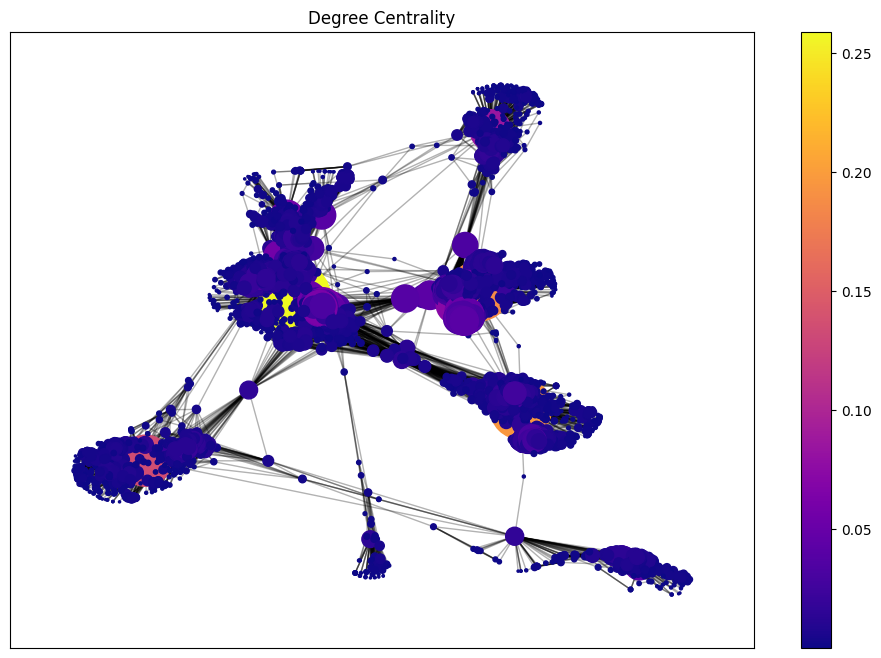

In [13]:
# Plot Degree Centrality
plot_centrality(G, pos, degree_centrality, 'Degree Centrality')

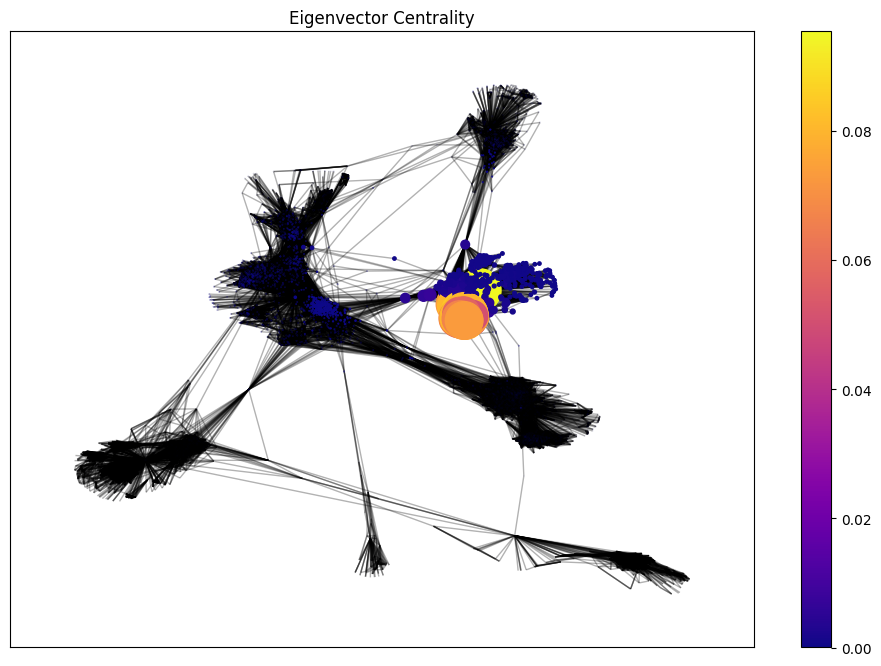

In [14]:
# Plot Eigenvector Centrality
plot_centrality(G, pos, eigenvector_centrality, 'Eigenvector Centrality')

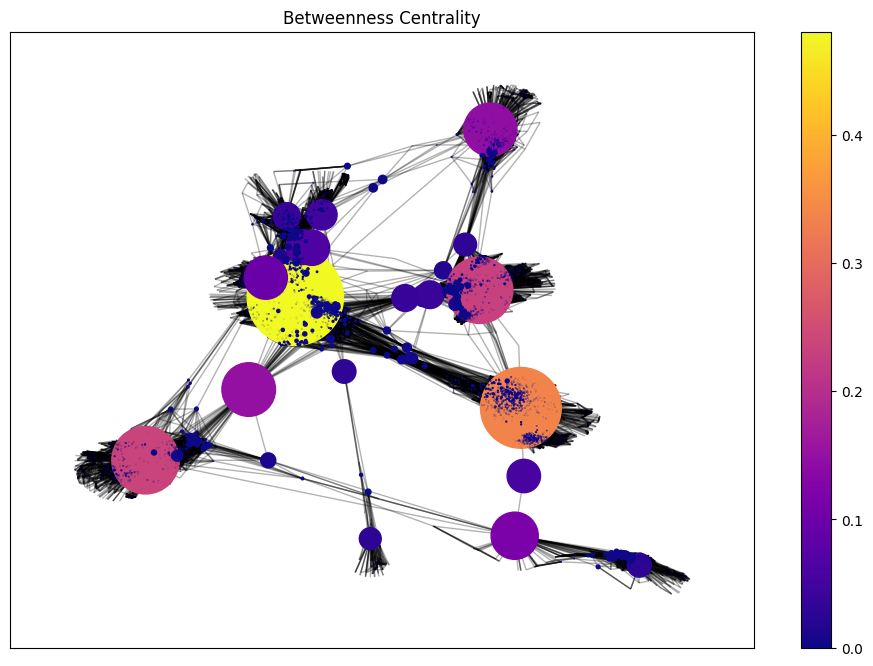

In [15]:
# Plot Betweenness Centrality
plot_centrality(G, pos, betweenness_centrality, 'Betweenness Centrality')

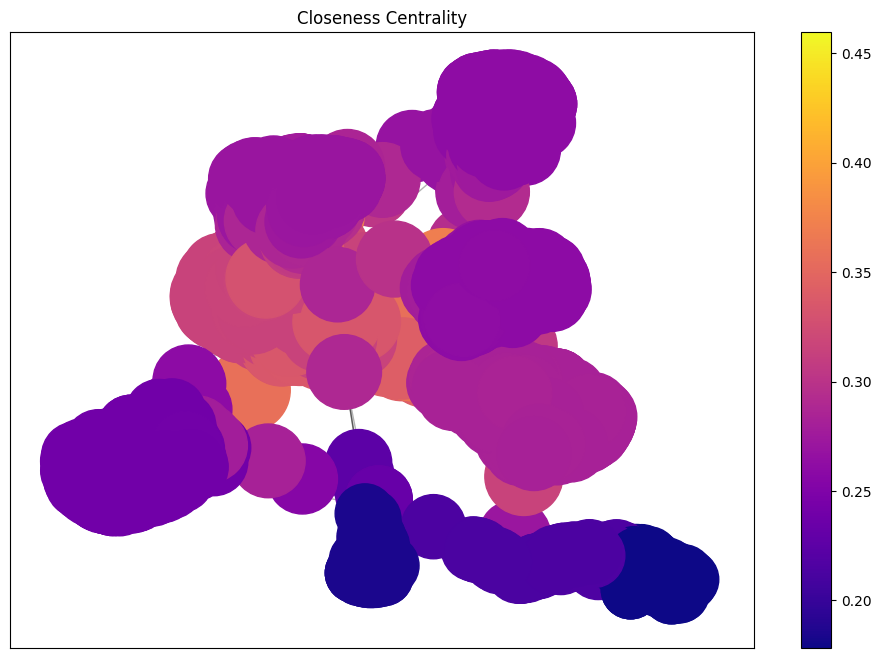

In [16]:
# Plot Closeness Centrality
plot_centrality(G, pos, closeness_centrality, 'Closeness Centrality')

# Example: Top 5 nodes by Degree Centrality

In [17]:
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by Degree Centrality:", top_degree_centrality)

Top 5 nodes by Degree Centrality: [(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354)]


# Degree Distribution

In [18]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = np.bincount(degree_sequence)
degrees = np.arange(len(degree_count))

Degree Sequence: [1045, 792, 755, 547, 347, 294, 291, 254, 245, 235, 234, 234, 231, 229, 226, 224, 223, 222, 221, 220, 217, 211, 210, 209, 207, 207, 207, 205, 205, 205, 205, 204, 203, 203, 202, 202, 201, 201, 201, 201, 200, 199, 199, 198, 198, 198, 198, 198, 197, 197, 197, 196, 196, 195, 195, 195, 195, 194, 193, 193, 193, 192, 192, 191, 191, 191, 191, 190, 190, 190, 190, 190, 190, 189, 189, 189, 188, 188, 188, 188, 187, 187, 187, 187, 186, 186, 186, 186, 185, 185, 185, 185, 184, 184, 184, 183, 183, 183, 182, 182, 182, 182, 182, 181, 181, 180, 180, 179, 179, 179, 178, 178, 178, 178, 178, 177, 177, 177, 177, 176, 176, 176, 176, 175, 175, 174, 174, 173, 173, 173, 173, 173, 173, 172, 172, 172, 171, 171, 171, 170, 170, 170, 169, 169, 169, 168, 168, 168, 168, 168, 167, 167, 166, 166, 166, 166, 165, 165, 165, 165, 165, 164, 164, 164, 164, 163, 162, 162, 161, 161, 161, 161, 160, 160, 160, 160, 160, 160, 159, 159, 159, 158, 158, 158, 158, 158, 157, 156, 156, 156, 156, 156, 156, 155, 155, 155, 1

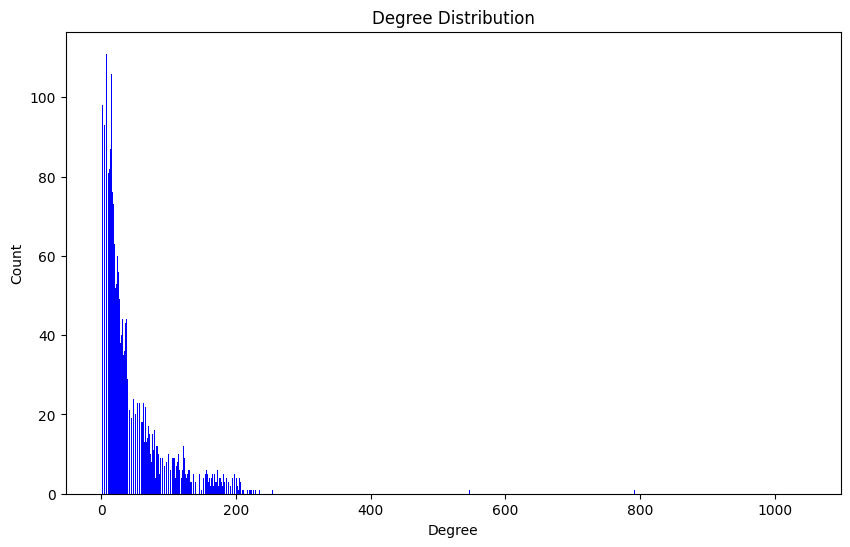

In [19]:
# Print degree sequence, degree count, and degrees
print("Degree Sequence:", degree_sequence)
print("Degree Count:", degree_count)
print("Degrees:", degrees)

plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_count, width=0.80, color='b')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

# Community Detection

In [20]:
communities = community.greedy_modularity_communities(G)
modularity_dict = {node: cid for cid, community in enumerate(communities) for node in community}

# Visualization of communities

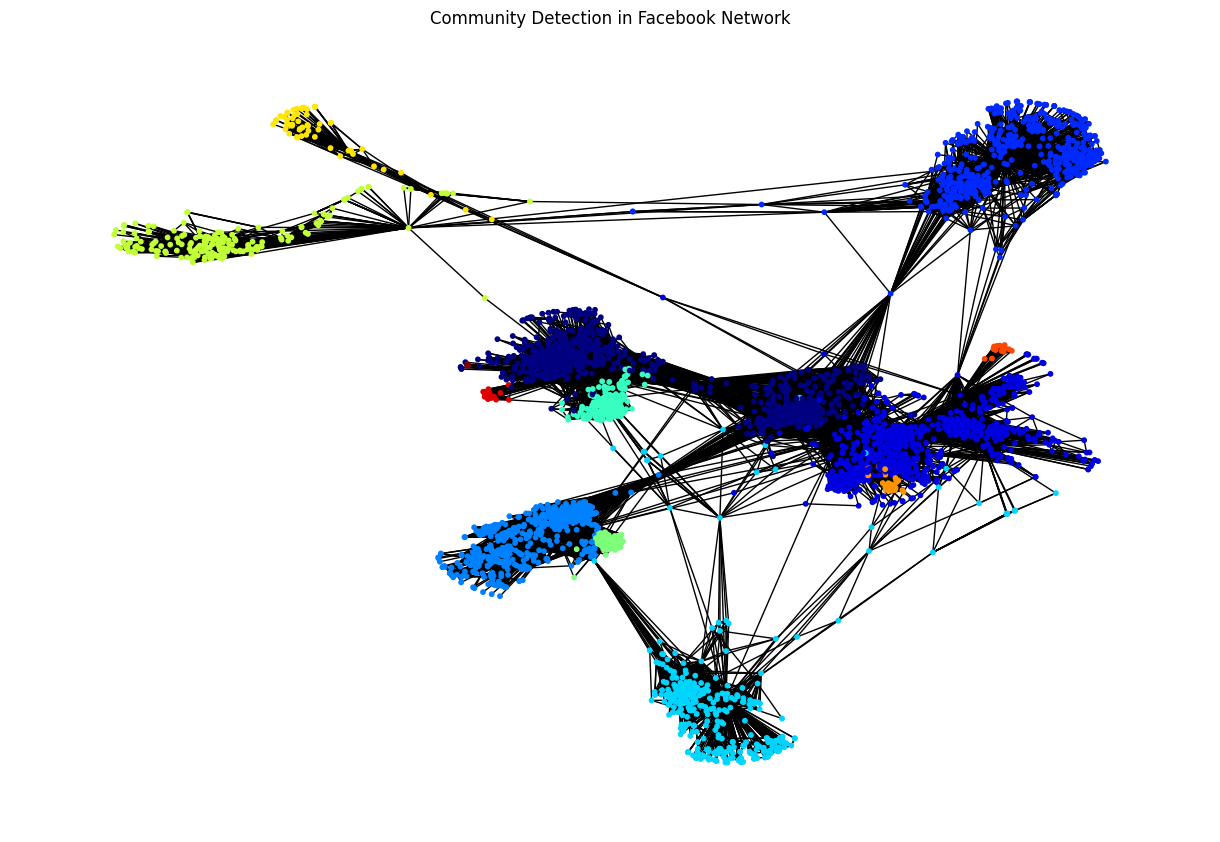

In [21]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
colors = [modularity_dict[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, node_size=10, cmap=plt.cm.jet)
plt.title('Community Detection in Facebook Network')
plt.show()